In [30]:
%matplotlib inline

In [29]:
import nltk

In [31]:
base = 'http://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode='
seasons = 6
episodes = 10

#all_urls() creates a list and populates it with urls 
#generated using the base url, and the number of seasons and episodes
def all_urls(seasons, episodes):
    all_urls = []
    for s in range(1,seasons+1):
        for e in range(1,episodes+1):
            full_url = base+'s{}e{}'.format(format(s,'02d'),format(e,'02d'))
            #print full_url
            all_urls.append(full_url)
    return all_urls

#tokenize_got_script() uses nltk to parse the dialogue and treat all words as objects, or "tokens"
def tokenize_got_script(txt_file):
    #hard coded exceptions; the basic module used in nltk strips all punctuation (there's probably one that doesn't)
    contractions = {'\'m':'am','\'re':'are','\'ve':'have','\'d':'would','\'ll':'will','\'nt':'not'}
    tokens = nltk.word_tokenize(txt_file)
    token = [t.replace(t,contractions[t]) if t in contractions else t for t in tokens]
    return tokens

for url in all_urls(seasons,episodes):

    filename = 'got_script_' + str(url[-5:]) + '.txt'
    with open(filename, 'r') as f:
        text = f.read()
        tokens = tokenize_got_script(text.decode('utf-8'))
        print f.name, len(tokens)

got_script_01e01.txt 3535
got_script_01e02.txt 4367
got_script_01e03.txt 4621
got_script_01e04.txt 6327
got_script_01e05.txt 6667
got_script_01e06.txt 4518
got_script_01e07.txt 4883
got_script_01e08.txt 4127
got_script_01e09.txt 5523
got_script_01e10.txt 4988
got_script_02e01.txt 5984
got_script_02e02.txt 6402
got_script_02e03.txt 5226
got_script_02e04.txt 5330
got_script_02e05.txt 6811
got_script_02e06.txt 5828
got_script_02e07.txt 6640
got_script_02e08.txt 6746
got_script_02e09.txt 4900
got_script_02e10.txt 5315
got_script_03e01.txt 5488
got_script_03e02.txt 6814
got_script_03e03.txt 6087
got_script_03e04.txt 6066
got_script_03e05.txt 7041
got_script_03e06.txt 5603
got_script_03e07.txt 6235
got_script_03e08.txt 5062
got_script_03e09.txt 4500
got_script_03e10.txt 6367
got_script_04e01.txt 6813
got_script_04e02.txt 5337
got_script_04e03.txt 6253
got_script_04e04.txt 4472
got_script_04e05.txt 5195
got_script_04e06.txt 5382
got_script_04e07.txt 5822
got_script_04e08.txt 5277
got_script_0

In [32]:
filename = 'got_script_01e01.txt'
with open(filename, 'r') as f:
    text = f.read()
    tokens = tokenize_got_script(text.decode('utf-8'))

# Using a pre-defined word bank to assess dialogue sentiment
https://www.quora.com/Is-there-a-downloadable-database-of-positive-and-negative-words

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('EffectWordNet.tsv',delimiter='\t',header=None)

In [35]:
df.head()

,0,1,2,3
0,2279615,+Effect,profiteer,"make an unreasonable profit, as on the sale o..."
1,205598,+Effect,"turn_around,pick_up","improve significantly; go from bad to good; ""..."
2,2342800,+Effect,"thrive,prosper,fly_high,flourish",make steady progress; be at the high point in...
3,1694263,+Effect,imitate,make a reproduction or copy of
4,2342016,+Effect,"accouter,accoutre",provide with military equipment


In [36]:
#We only need the word and its polarity...
df.columns = ['some_number','polarity','word','definition']
df['polarity'] = [1 if p == '+Effect' else -1 if p == '-Effect' else 0 for p in df['polarity']]
df = df[['polarity','word']]

In [37]:
df

,polarity,word
0,1,profiteer
1,1,"turn_around,pick_up"
2,1,"thrive,prosper,fly_high,flourish"
3,1,imitate
4,1,"accouter,accoutre"
5,1,"preach,prophesy"
6,1,carry
7,1,"manoeuver,maneuver,manoeuvre,operate"
8,1,"dress_up,window-dress"
9,1,bias


In [38]:
pos = df[df['polarity'] == 1]
neg = df[df['polarity'] == -1]
nul = df[df['polarity'] == 0]

In [39]:
#How to deal with these gross multi-word entries... Just create a new dataframe for each polarity value!

In [40]:
#Aggregate all the words into one list
pos_words = [','.join(pos['word'].values)]

In [41]:
pos_words

["profiteer,turn_around,pick_up,thrive,prosper,fly_high,flourish,imitate,accouter,accoutre,preach,prophesy,carry,manoeuver,maneuver,manoeuvre,operate,dress_up,window-dress,bias,Christianize,subsidize,subsidise,apotheosize,apotheosise,apotheose,sulphur,sulfur,pick_up,shop,browse,neutralize,neutralise,guesstimate,pullulate,conserve,preserve,maintain,keep_up,pacify,expand,spread_out,countersign,transfuse,call,color,colour,emblazon,inject,egotrip,clamp,compass,restore,reinstate,reestablish,certify,compensate,counterbalance,correct,make_up,even_out,even_off,even_up,model,simulate,bounce,show,show_up,tip,fee,bung,revalue,clear,prepare,redevelop,body_guard,head,head_up,confirm,undervalue,underestimate,understand,read,interpret,translate,sprout,stock,nod,give,pay,devote,sign,ratify,deserve,merit,leave_no_stone_unturned,partake,share,partake_in,uncross,disarm,unarm,table,tabularize,tabularise,tabulate,echo,recall,nutrify,aliment,nourish,computerize,computerise,adulate,cream_off,skim_off,ride,si

In [42]:
#Create a dataframe for all positive words with a hard-coded polarity of 1
pos_df = pd.DataFrame([w.split(',') for w in pos_words]).transpose()
pos_df.rename(columns={0:'word'},inplace=True)
pos_df['polarity'] = 1

In [43]:
pos_df.head()

,word,polarity
0,profiteer,1
1,turn_around,1
2,pick_up,1
3,thrive,1
4,prosper,1


In [44]:
#Cool.  Now the same for negative and neutral words

In [45]:
neg_words = [','.join(neg['word'].values)]
neg_df = pd.DataFrame([w.split(',') for w in neg_words]).transpose()
neg_df.rename(columns={0:'word'},inplace=True)
neg_df['polarity'] = -1

nul_words = [','.join(nul['word'].values)]
nul_df = pd.DataFrame([w.split(',') for w in nul_words]).transpose()
nul_df.rename(columns={0:'word'},inplace=True)
nul_df['polarity'] = 0

In [46]:
#Now we just need a way to match words in the dialogue to words in each wordbank/word dataframe

In [47]:
#get_score() takes a list of tokens and assesses their net polarity
#i.e. a list containing ['this','is','bad','bad','bad'] will likely have a score of -3
def get_score(tokens):
    score = 0

    for t in tokens:
        if t.lower() in pos_df['word'].values:
            score += 1

        if t.lower() in neg_df['word'].values:
            score -= 1

    return score

# Go ahead and test get_score(), but need to fix for contractions

In [48]:
sentiment = []

for url in all_urls(seasons,episodes):

    filename = 'got_script_' + str(url[-5:]) + '.txt'
    with open(filename, 'r') as f:
        text = f.read()
        tokens = tokenize_got_script(text.decode('utf-8'))
        score = get_score(tokens)
        entry = (str(url[-5:]), score)
        try:
            sentiment.append(entry)
        except Exception:
            pass
        
        print entry

('01e01', 225)
('01e02', 164)
('01e03', 208)
('01e04', 283)
('01e05', 302)
('01e06', 223)
('01e07', 275)
('01e08', 241)
('01e09', 261)
('01e10', 245)
('02e01', 361)
('02e02', 350)
('02e03', 264)
('02e04', 296)
('02e05', 358)
('02e06', 323)
('02e07', 364)
('02e08', 280)
('02e09', 253)
('02e10', 341)
('03e01', 330)
('03e02', 323)
('03e03', 313)
('03e04', 240)
('03e05', 319)
('03e06', 267)
('03e07', 371)
('03e08', 293)
('03e09', 269)
('03e10', 301)
('04e01', 312)
('04e02', 307)
('04e03', 364)
('04e04', 248)
('04e05', 252)
('04e06', 272)
('04e07', 258)
('04e08', 237)
('04e09', 143)
('04e10', 192)
('05e01', 251)
('05e02', 260)
('05e03', 316)
('05e04', 212)
('05e05', 241)
('05e06', 223)
('05e07', 246)
('05e08', 232)
('05e09', 234)
('05e10', 117)
('06e01', 127)
('06e02', 168)
('06e03', 238)
('06e04', 268)
('06e05', 275)
('06e06', 215)
('06e07', 241)
('06e08', 272)
('06e09', 186)
('06e10', 243)


In [12]:
sent_df = pd.DataFrame(sentiment)
sent_df.columns = ['episode','sentiment']
sent_df['epID'] = [x[1] + x[3:] for x in sent_df['episode']]
sent_df[['epID','sentiment']].to_csv('got_sentiment.csv',index=False)

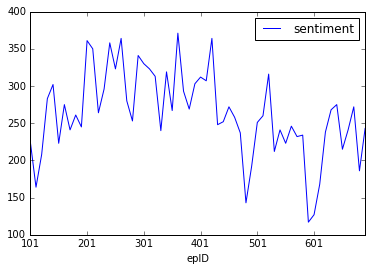

In [13]:
sent_df.plot(x='epID',y='sentiment')

In [14]:
table = 'token_sentiment'

In [16]:
import sqlite3
conn = sqlite3.connect('got.db')
c = conn.cursor()
sent_df.to_sql(table,conn)
conn.commit()
conn.close()

In [1]:
import os

In [ ]:
os.get

In [ ]:
puncts = ['\'','"','?','.',',',':',';','-','!','\'\'']

contractions = {'\'m':'am','\'re':'are','\'ve':'have','\'d':'would','\'ll':'will'}